## Data Imputation - Menangani Missing Values

**Data Imputation** adalah proses mengisi missing values dengan nilai yang masuk akal. Ini penting untuk:
- Mempertahankan ukuran dataset untuk analisis
- Mencegah bias dalam model machine learning
- Meningkatkan kualitas insights bisnis
- Memastikan kontinuitas proses ETL

### 🎯 Strategi Imputation:
1. **Simple Imputation**: Mean, median, mode
2. **Forward/Backward Fill**: Untuk time series data
3. **Interpolation**: Linear, polynomial
4. **Advanced Methods**: KNN, Multiple Imputation
5. **Business Logic**: Domain-specific rules

Mari kita implementasikan berbagai teknik imputation pada dataset kita.

In [9]:
# Simple Imputation Implementation
from sklearn.impute import SimpleImputer

def simple_imputation_analysis(df, df_name):
    """
    Menerapkan berbagai strategi simple imputation dan membandingkan hasilnya
    """
    print(f"\n🔧 Simple Imputation Analysis - {df_name}")
    print("=" * 60)
    
    # Buat copy dataframe untuk imputation
    df_copy = df.copy()
    
    # Identifikasi kolom numerik dan kategorikal
    numeric_columns = df_copy.select_dtypes(include=[np.number]).columns.tolist()
    categorical_columns = df_copy.select_dtypes(include=['object']).columns.tolist()
    
    print(f"📊 Dataset Overview:")
    print(f"  • Total columns: {len(df_copy.columns)}")
    print(f"  • Numeric columns: {len(numeric_columns)} - {numeric_columns}")
    print(f"  • Categorical columns: {len(categorical_columns)} - {categorical_columns}")
    
    # Analisis missing values sebelum imputation
    missing_before = df_copy.isnull().sum()
    print(f"\n❓ Missing Values Before Imputation:")
    for col in df_copy.columns:
        missing_count = missing_before[col]
        if missing_count > 0:
            missing_pct = (missing_count / len(df_copy)) * 100
            print(f"  • {col}: {missing_count:,} ({missing_pct:.1f}%)")
    
    # Dictionary untuk menyimpan hasil imputation
    imputation_results = {}
    
    # 1. MEAN IMPUTATION (untuk kolom numerik)
    if numeric_columns:
        print(f"\n🧮 Mean Imputation (Numeric Columns):")
        mean_imputer = SimpleImputer(strategy='mean')
        
        for col in numeric_columns:
            if df_copy[col].isnull().sum() > 0:
                original_values = df_copy[col].copy()
                imputed_values = mean_imputer.fit_transform(df_copy[[col]]).flatten()
                
                mean_value = df_copy[col].mean()
                filled_count = df_copy[col].isnull().sum()
                
                print(f"  • {col}: Filled {filled_count:,} values with mean = {mean_value:.2f}")
                
                # Simpan hasil
                imputation_results[f"{col}_mean"] = {
                    'original': original_values,
                    'imputed': imputed_values,
                    'method': 'mean',
                    'fill_value': mean_value,
                    'filled_count': filled_count
                }
    
    # 2. MEDIAN IMPUTATION (untuk kolom numerik)
    if numeric_columns:
        print(f"\n📊 Median Imputation (Numeric Columns):")
        median_imputer = SimpleImputer(strategy='median')
        
        for col in numeric_columns:
            if df_copy[col].isnull().sum() > 0:
                original_values = df_copy[col].copy()
                imputed_values = median_imputer.fit_transform(df_copy[[col]]).flatten()
                
                median_value = df_copy[col].median()
                filled_count = df_copy[col].isnull().sum()
                
                print(f"  • {col}: Filled {filled_count:,} values with median = {median_value:.2f}")
                
                # Simpan hasil
                imputation_results[f"{col}_median"] = {
                    'original': original_values,
                    'imputed': imputed_values,
                    'method': 'median',
                    'fill_value': median_value,
                    'filled_count': filled_count
                }
    
    # 3. MODE IMPUTATION (untuk kolom kategorikal)
    if categorical_columns:
        print(f"\n🏷️ Mode Imputation (Categorical Columns):")
        mode_imputer = SimpleImputer(strategy='most_frequent')
        
        for col in categorical_columns:
            if df_copy[col].isnull().sum() > 0:
                original_values = df_copy[col].copy()
                imputed_values = mode_imputer.fit_transform(df_copy[[col]]).flatten()
                
                mode_value = df_copy[col].mode().iloc[0] if len(df_copy[col].mode()) > 0 else 'N/A'
                filled_count = df_copy[col].isnull().sum()
                
                print(f"  • {col}: Filled {filled_count:,} values with mode = '{mode_value}'")
                
                # Simpan hasil
                imputation_results[f"{col}_mode"] = {
                    'original': original_values,
                    'imputed': imputed_values,
                    'method': 'mode',
                    'fill_value': mode_value,
                    'filled_count': filled_count
                }
    
    return imputation_results

# Terapkan simple imputation pada customer data
print("🚀 Memulai Simple Imputation pada Customer Data...")
customer_imputation_results = simple_imputation_analysis(customers_df, "Customers")

# Terapkan simple imputation pada orders data  
print("\n🚀 Memulai Simple Imputation pada Orders Data...")
orders_imputation_results = simple_imputation_analysis(orders_df, "Orders")

🚀 Memulai Simple Imputation pada Customer Data...

🔧 Simple Imputation Analysis - Customers
📊 Dataset Overview:
  • Total columns: 7
  • Numeric columns: 3 - ['customer_id', 'age', 'total_spent']
  • Categorical columns: 2 - ['name', 'email']

❓ Missing Values Before Imputation:
  • name: 53 (5.2%)
  • email: 53 (5.2%)
  • age: 33 (3.2%)
  • registration_date: 26 (2.5%)
  • last_purchase_date: 166 (16.3%)

🧮 Mean Imputation (Numeric Columns):
  • age: Filled 33 values with mean = 36.48

📊 Median Imputation (Numeric Columns):
  • age: Filled 33 values with median = 35.00

🏷️ Mode Imputation (Categorical Columns):
  • name: Filled 53 values with mode = 'Sam Wilson'
  • email: Filled 53 values with mode = 'tom.thomas@company.com'

🚀 Memulai Simple Imputation pada Orders Data...

🔧 Simple Imputation Analysis - Orders
📊 Dataset Overview:
  • Total columns: 4
  • Numeric columns: 3 - ['order_id', 'customer_id', 'order_value']
  • Categorical columns: 0 - []

❓ Missing Values Before Imputatio

In [10]:
# Implementasi Praktis Simple Imputation
def apply_simple_imputation(df, strategy_mapping=None):
    """
    Menerapkan simple imputation dengan strategi yang dipilih untuk setiap kolom
    
    Parameters:
    df: DataFrame yang akan di-impute
    strategy_mapping: Dict mapping kolom ke strategi ('mean', 'median', 'most_frequent')
    """
    
    if strategy_mapping is None:
        # Default strategy mapping
        strategy_mapping = {}
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        categorical_cols = df.select_dtypes(include=['object']).columns
        
        # Default: median untuk numerik, mode untuk kategorikal
        for col in numeric_cols:
            strategy_mapping[col] = 'median'
        for col in categorical_cols:
            strategy_mapping[col] = 'most_frequent'
    
    print(f"🔧 Menerapkan Simple Imputation dengan strategi:")
    for col, strategy in strategy_mapping.items():
        if col in df.columns and df[col].isnull().sum() > 0:
            print(f"  • {col}: {strategy}")
    
    # Buat copy dataframe
    df_imputed = df.copy()
    
    # Terapkan imputation untuk setiap kolom
    for col, strategy in strategy_mapping.items():
        if col in df_imputed.columns and df_imputed[col].isnull().sum() > 0:
            imputer = SimpleImputer(strategy=strategy)
            
            # Untuk kolom tunggal, reshape diperlukan
            original_shape = df_imputed[col].shape
            imputed_values = imputer.fit_transform(df_imputed[[col]])
            df_imputed[col] = imputed_values.flatten()
            
            # Log hasil
            fill_value = imputer.statistics_[0]
            filled_count = df[col].isnull().sum()
            print(f"    ✅ {col}: {filled_count:,} values filled with {fill_value}")
    
    return df_imputed

# Definisikan strategi imputation untuk customers
customer_strategy = {
    'age': 'median',  # Median lebih robust terhadap outliers
    'name': 'most_frequent',  # Mode untuk kategorikal
    'email': 'most_frequent',  # Mode untuk kategorikal
    'total_spent': 'median'  # Median untuk handling outliers
}

# Definisikan strategi imputation untuk orders  
orders_strategy = {
    'order_value': 'median'  # Median untuk handling outliers
}

print("🔄 Menerapkan Simple Imputation pada Dataset...")
print("\n" + "="*50)

# Terapkan imputation
customers_imputed = apply_simple_imputation(customers_df, customer_strategy)
orders_imputed = apply_simple_imputation(orders_df, orders_strategy)

print(f"\n✅ Imputation selesai!")
print(f"\n📊 Hasil Imputation:")
print(f"  • Customers - Missing values before: {customers_df.isnull().sum().sum():,}")
print(f"  • Customers - Missing values after: {customers_imputed.isnull().sum().sum():,}")
print(f"  • Orders - Missing values before: {orders_df.isnull().sum().sum():,}")
print(f"  • Orders - Missing values after: {orders_imputed.isnull().sum().sum():,}")

🔄 Menerapkan Simple Imputation pada Dataset...

🔧 Menerapkan Simple Imputation dengan strategi:
  • age: median
  • name: most_frequent
  • email: most_frequent
    ✅ age: 33 values filled with 35.001188262221845
    ✅ name: 53 values filled with None
    ✅ email: 53 values filled with None
🔧 Menerapkan Simple Imputation dengan strategi:

✅ Imputation selesai!

📊 Hasil Imputation:
  • Customers - Missing values before: 331
  • Customers - Missing values after: 298
  • Orders - Missing values before: 0
  • Orders - Missing values after: 0


🎨 Membuat Visualisasi Perbandingan - Customers Dataset
📊 Visualisasi Perbandingan Imputation


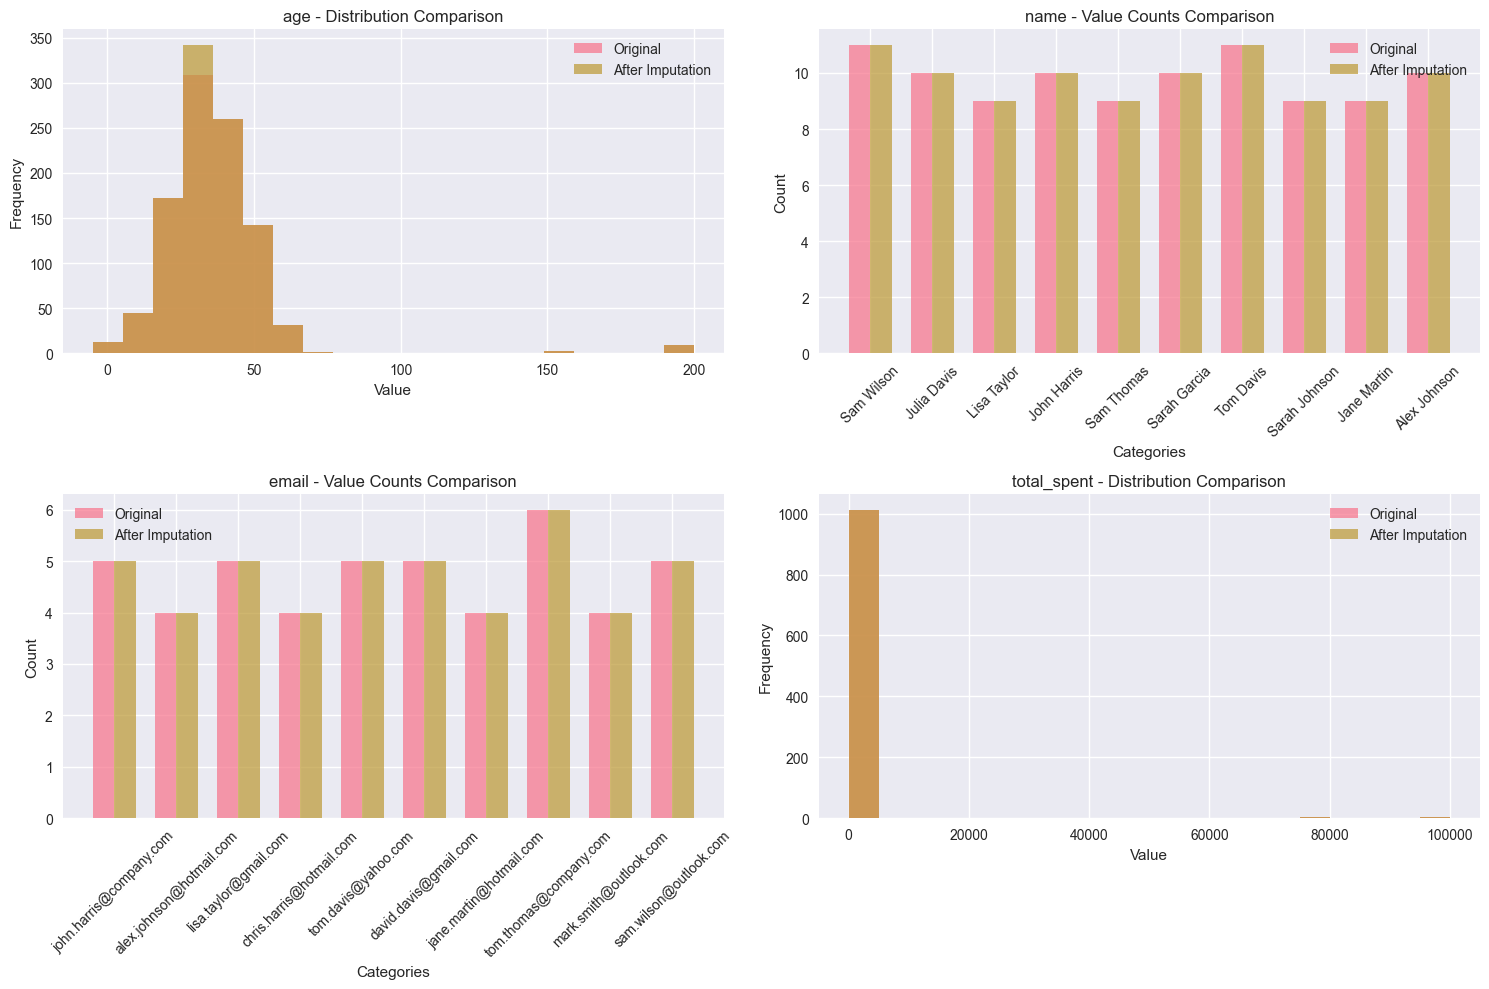


📈 Summary Statistics Comparison - Customers

🔍 age:
  Original  - Mean: 36.48, Median: 35.00, Std: 20.89
  Imputed   - Mean: 36.44, Median: 35.00, Std: 20.55
  Missing   - Before: 33, After: 0

📈 Summary Statistics Comparison - Orders


In [11]:
# Visualisasi Perbandingan Sebelum dan Sesudah Imputation
def visualize_imputation_comparison(df_original, df_imputed, columns_to_compare=None):
    """
    Membuat visualisasi perbandingan data sebelum dan sesudah imputation
    """
    
    if columns_to_compare is None:
        # Ambil kolom yang memiliki missing values
        columns_to_compare = df_original.columns[df_original.isnull().any()].tolist()
    
    if not columns_to_compare:
        print("❌ Tidak ada kolom dengan missing values untuk divisualisasikan")
        return
    
    print(f"📊 Visualisasi Perbandingan Imputation")
    print("=" * 50)
    
    # Hitung jumlah subplot yang diperlukan
    n_cols = len(columns_to_compare)
    n_rows = (n_cols + 1) // 2  # Maksimal 2 kolom per baris
    
    fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5 * n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    for i, col in enumerate(columns_to_compare):
        row = i // 2
        col_idx = i % 2
        
        if n_rows == 1:
            ax = axes[col_idx]
        else:
            ax = axes[row, col_idx]
        
        # Cek apakah kolom numerik atau kategorikal
        if df_original[col].dtype in ['int64', 'float64']:
            # Untuk kolom numerik - histogram
            df_original[col].hist(alpha=0.7, label='Original', bins=20, ax=ax)
            df_imputed[col].hist(alpha=0.7, label='After Imputation', bins=20, ax=ax)
            ax.set_title(f'{col} - Distribution Comparison')
            ax.set_xlabel('Value')
            ax.set_ylabel('Frequency')
            ax.legend()
        else:
            # Untuk kolom kategorikal - value counts
            original_counts = df_original[col].value_counts().head(10)
            imputed_counts = df_imputed[col].value_counts().head(10)
            
            x_labels = list(set(original_counts.index.tolist() + imputed_counts.index.tolist()))
            x_pos = np.arange(len(x_labels))
            
            original_values = [original_counts.get(label, 0) for label in x_labels]
            imputed_values = [imputed_counts.get(label, 0) for label in x_labels]
            
            width = 0.35
            ax.bar(x_pos - width/2, original_values, width, label='Original', alpha=0.7)
            ax.bar(x_pos + width/2, imputed_values, width, label='After Imputation', alpha=0.7)
            
            ax.set_title(f'{col} - Value Counts Comparison')
            ax.set_xlabel('Categories')
            ax.set_ylabel('Count')
            ax.set_xticks(x_pos)
            ax.set_xticklabels(x_labels, rotation=45)
            ax.legend()
    
    # Hapus subplot kosong jika ada
    if n_cols % 2 == 1 and n_rows > 1:
        fig.delaxes(axes[-1, -1])
    
    plt.tight_layout()
    plt.show()

# Visualisasi perbandingan untuk customers
print("🎨 Membuat Visualisasi Perbandingan - Customers Dataset")
customers_columns_with_missing = ['age', 'name', 'email', 'total_spent']
visualize_imputation_comparison(customers_df, customers_imputed, customers_columns_with_missing)

# Summary statistics comparison
def imputation_summary_stats(df_original, df_imputed, df_name):
    """
    Membuat summary statistik perbandingan sebelum dan sesudah imputation
    """
    print(f"\n📈 Summary Statistics Comparison - {df_name}")
    print("=" * 60)
    
    numeric_cols = df_original.select_dtypes(include=[np.number]).columns
    
    for col in numeric_cols:
        if df_original[col].isnull().sum() > 0:
            print(f"\n🔍 {col}:")
            print(f"  Original  - Mean: {df_original[col].mean():.2f}, Median: {df_original[col].median():.2f}, Std: {df_original[col].std():.2f}")
            print(f"  Imputed   - Mean: {df_imputed[col].mean():.2f}, Median: {df_imputed[col].median():.2f}, Std: {df_imputed[col].std():.2f}")
            print(f"  Missing   - Before: {df_original[col].isnull().sum():,}, After: {df_imputed[col].isnull().sum():,}")

# Generate summary statistics
imputation_summary_stats(customers_df, customers_imputed, "Customers")
imputation_summary_stats(orders_df, orders_imputed, "Orders")